In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
data= pd.read_csv('titanic.csv')  # Make sure to provide the correct path to your dataset

# Display the first few rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Display the data types and summary statistics
print(data.info())
print(data.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

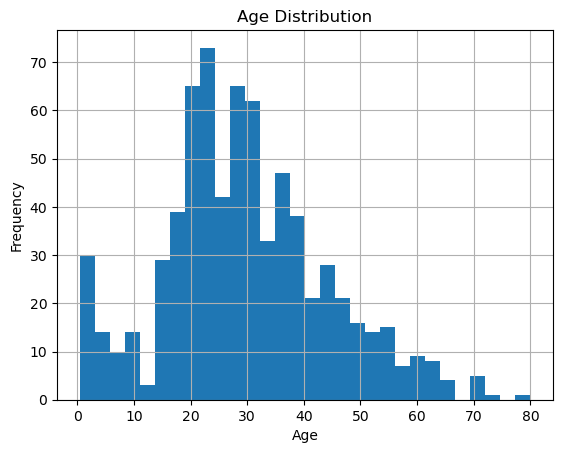

In [3]:
# Histograms
data['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


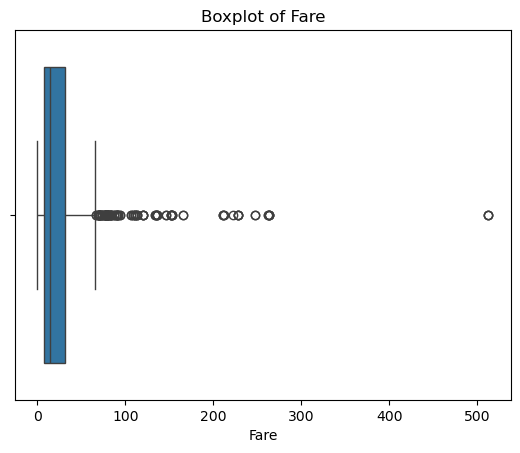

In [4]:
# Box plot for fare
sns.boxplot(x='Fare', data=data)
plt.title('Boxplot of Fare')
plt.show()

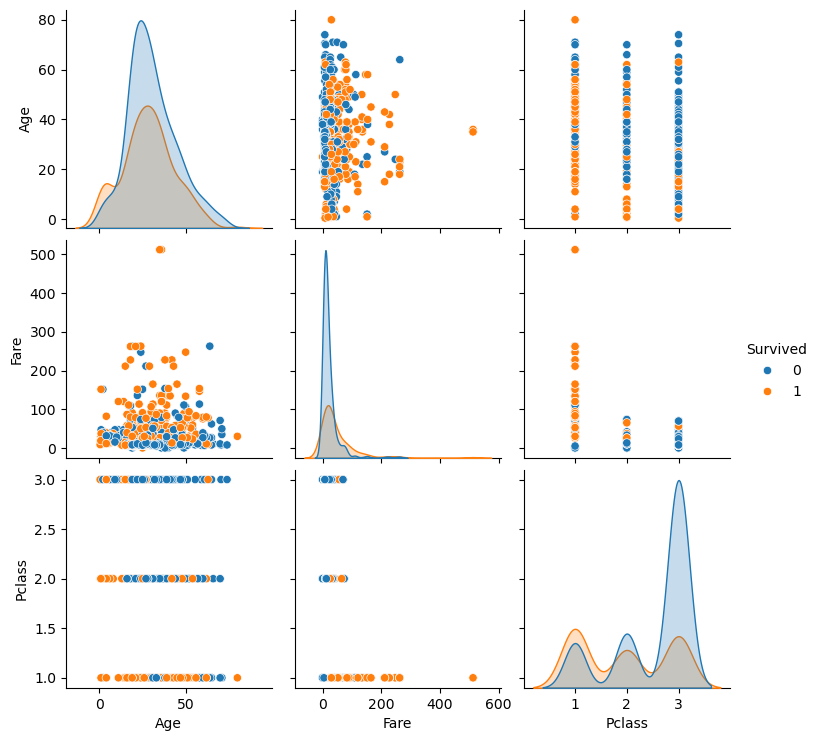

In [5]:
# Pair plot
sns.pairplot(data, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.show()

In [8]:
# Impute missing values for 'Age' and 'Embarked'
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to excessive missing values
data.drop(columns=['Cabin'], inplace=True)


C:\Users\punee\AppData\Local\Temp\ipykernel_45920\3519648762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\punee\AppData\Local\Temp\ipykernel_45920\3519648762.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [9]:
# One-hot encoding for 'Embarked' and 'Sex'
data = pd.get_dummies(data, columns=['Embarked', 'Sex'], drop_first=True)

# Drop unnecessary columns
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


C:\Users\punee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [12]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [13]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.81
Precision: 0.79
Recall: 0.73
F1 Score: 0.76
ROC AUC Score: 0.88


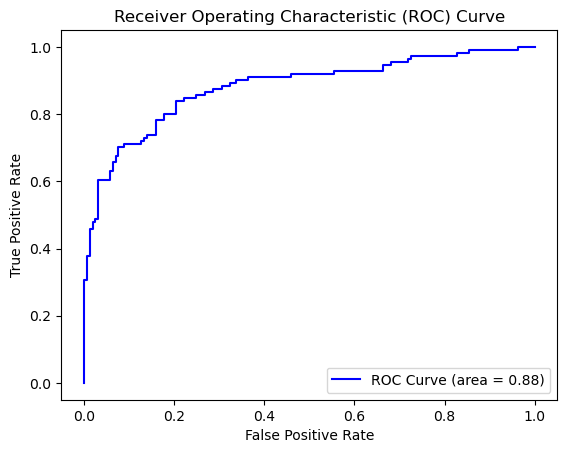

In [14]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
#plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [15]:
# Create a DataFrame for the coefficients
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)


            Coefficient
Pclass        -0.912535
Age           -0.033027
SibSp         -0.268193
Parch         -0.080036
Fare           0.002755
Embarked_Q    -0.113697
Embarked_S    -0.519084
Sex_male      -2.469993


In [16]:
import streamlit as st

In [17]:
# 6. Deployment with Streamlit
st.title("Titanic Survival Prediction")
st.sidebar.header('user input parameter')
def user_input_features():
    Pclass = st.sidebar.selectbox("Pclass", [1, 2, 3])
    Sex = st.sidebar.selectbox("Sex", ['male', 'female'])
    Age = st.sidebar.slider("Age", 0, 100, 30)
    SibSp = st.sidebar.slider("Siblings/Spouses Aboard", 0, 10, 0)
    Parch = st.sidebar.slider("Parents/Children Aboard", 0, 10, 0)
    Fare = st.sidebar.slider("Fare", 0.0, 500.0, 50.0)
    Embarked = st.sidebar.selectbox("Embarked", ['C', 'Q', 'S'])

    data = {
        'Pclass': [Pclass],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Sex_male': [1 if Sex == 'male' else 0],
        'Embarked_Q': [1 if Embarked == 'Q' else 0],
        'Embarked_S': [1 if Embarked == 'S' else 0]
    }
    features=pd.DataFrame(data, index=[0])
    return features

2024-12-12 21:34:54.617 
  command:

    streamlit run C:\Users\punee\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [18]:
df=user_input_features()
st.subheader('User Input Parameter')
st.write(df)

In [21]:
titanic=pd.read_csv('titanic.csv')
titanic=titanic.dropna()

In [26]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
deploy=LogisticRegression()
deploy.fit(X,y)

C:\Users\punee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\punee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()

In [35]:
# Make predictions
prediction = deploy.predict(X_test)
prediction_proba = deploy.predict_proba(X_test)[:, 1]

In [36]:
# Make predictions
prediction = model.predict(X_test)[0]  # Binary prediction
prediction_proba = model.predict_proba(X_test)[0]  # Probabilities for each class

st.subheader('Predicted Result')
st.write('Yes' if prediction == 1 else 'No')

st.subheader('Prediction Probability')
st.write(f"Probability of Survival: {prediction_proba[1]:.2f}")

In [23]:
print("1. Difference Between Precision and Recall:")
print("Precision: The proportion of correctly predicted positive cases out of all predicted positive cases. Focuses on minimizing false positives.")
print("Recall: The proportion of correctly predicted positive cases out of all actual positive cases. Focuses on minimizing false negatives.")
print("**********************************************************************************************")
print("2. What is Cross-Validation, and Why is it Important in Binary Classification?")
print("Cross-validation splits the dataset into multiple training and testing subsets to evaluate model performance more reliably. It prevents overfitting and ensures the model generalizes well to unseen data.")

1. Difference Between Precision and Recall:
Precision: The proportion of correctly predicted positive cases out of all predicted positive cases. Focuses on minimizing false positives.
Recall: The proportion of correctly predicted positive cases out of all actual positive cases. Focuses on minimizing false negatives.
**********************************************************************************************
2. What is Cross-Validation, and Why is it Important in Binary Classification?
Cross-validation splits the dataset into multiple training and testing subsets to evaluate model performance more reliably. It prevents overfitting and ensures the model generalizes well to unseen data.
